# Importing Data and Packages

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
Data= pd.read_csv('data (1).csv')

# Dataset information

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


# Checking if there are null values in any columns


In [4]:
Data.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

#### In our data there is no null value

## Seprating out the categorical and continuous variables

-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types

In [46]:
df=Data
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 30:       # nunique:  returns unique values in the column,
                                                    #here 20 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

## Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)


In [47]:
#Since floor is not continuous we can move it to categorical

continuous.remove("floor")
categorical.append("floor")
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
animal          fire insurance (R$)
furniture       total (R$)
floor


# -------------------------------------------Unvariate Analysis--------------------------------------

## Analyzing Columns of Categorical Data

### City Analysis

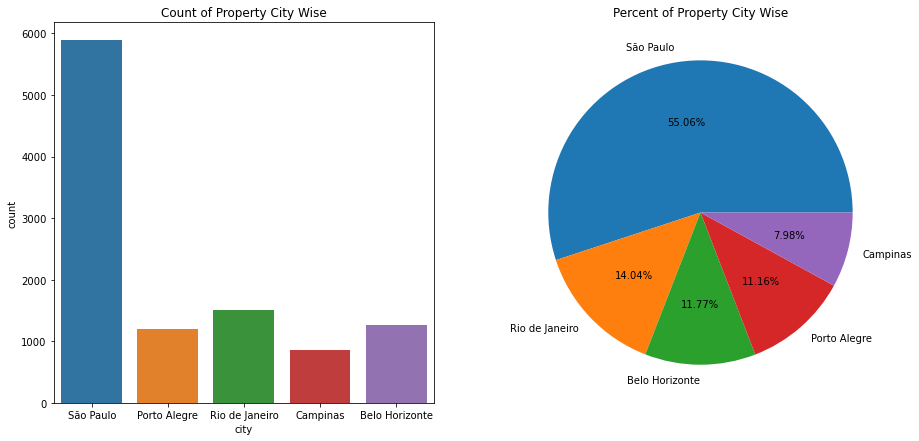

In [9]:
df=Data
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Property City Wise")  
ax[1].set_title("Percent of Property City Wise")  # Set the title of the graph
percentage = df["city"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["city"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### From the above chart we can see that maximum number of property that 'Castro Brazila Inc.' have are from Sao Paulo

## Rooms Analysis

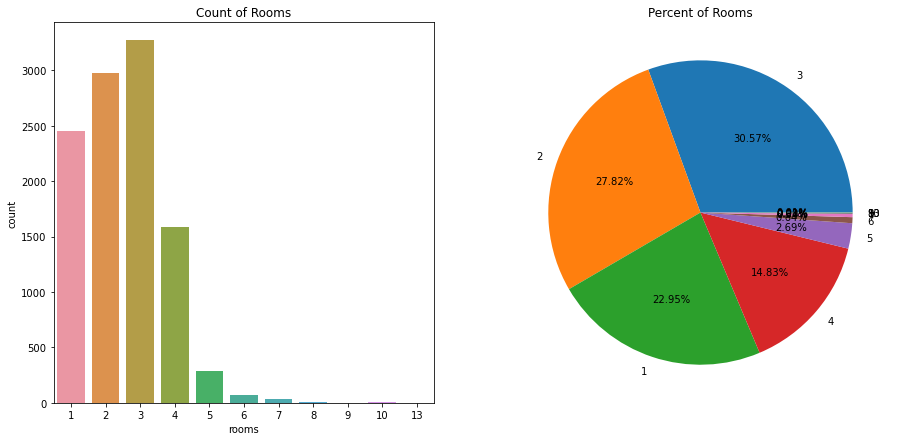

In [10]:
df=Data
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Rooms")  
ax[1].set_title("Percent of Rooms")  # Set the title of the graph
percentage = df["rooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["rooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### In the entire property 'Castro Brazila Inc.' have 75 percent property comes in between 1-4 rooms

### Parking Spaces Analysis

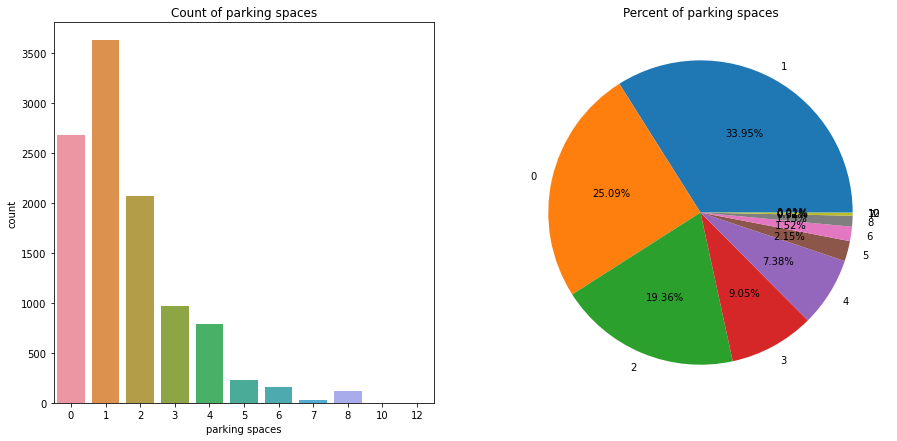

In [11]:
df=Data
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of parking spaces")  
ax[1].set_title("Percent of parking spaces")  # Set the title of the graph
percentage = df["parking spaces"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["parking spaces"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### Most of the property have 0-4 vehicle parking space

### Animal Frandly or Not

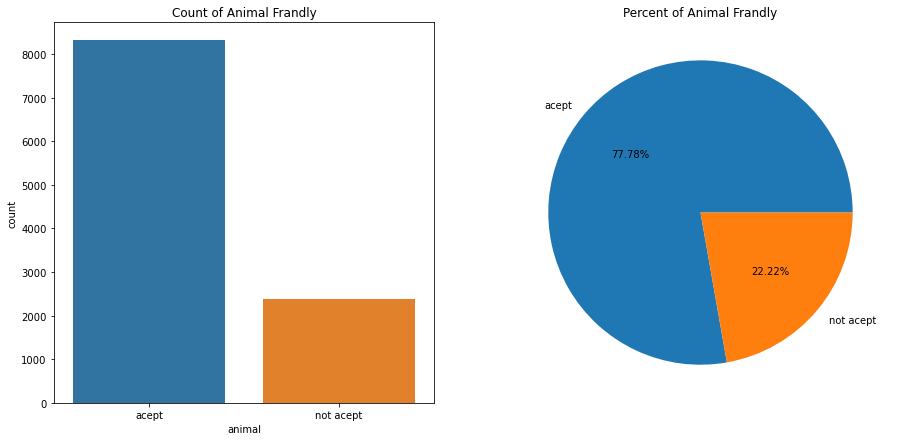

In [12]:
df=Data
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Animal Frandly")  
ax[1].set_title("Percent of Animal Frandly")  # Set the title of the graph
percentage = df["animal"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["animal"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### From the above chart we can see that most of the property are Animal Freindly

### Furniture Analysis

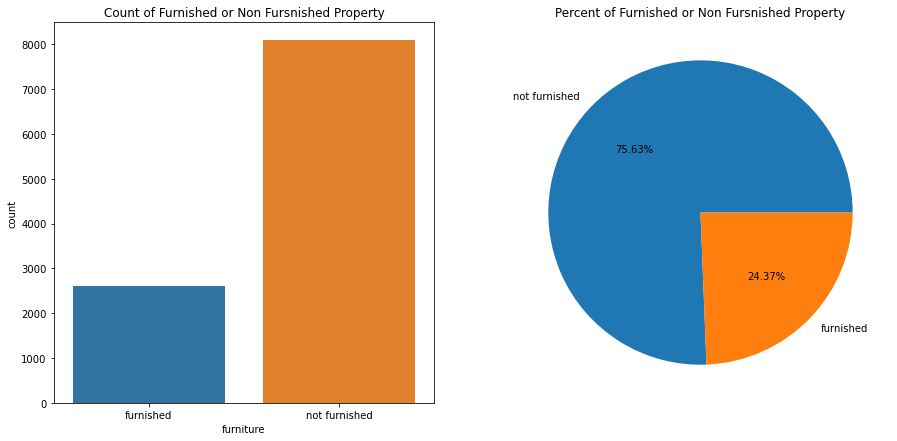

In [13]:
df=Data
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Furnished or Non Fursnished Property")  
ax[1].set_title("Percent of Furnished or Non Fursnished Property")  # Set the title of the graph
percentage = df["furniture"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["furniture"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### From the above chart we can conclude that most of the property are not fursnished

# Floor Analysis

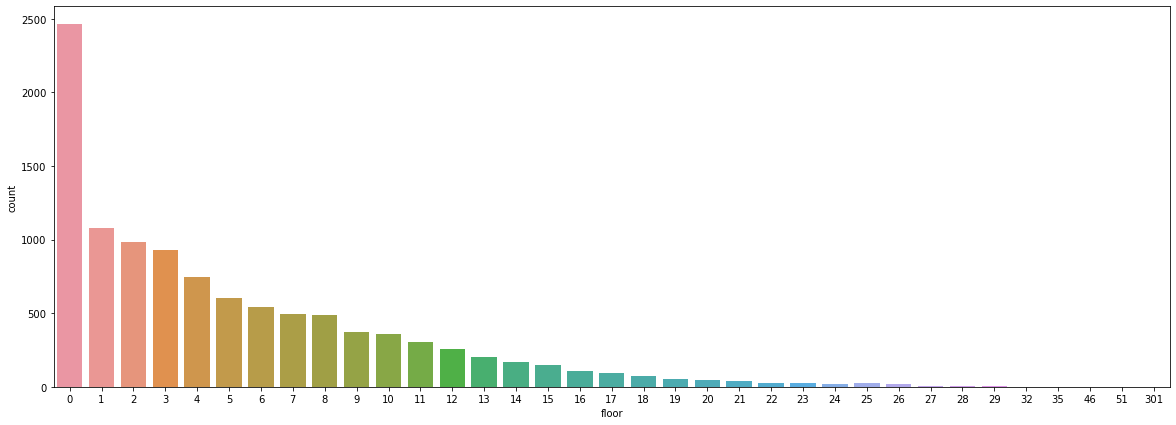

In [14]:
df=Data
labels = list(df["floor"].value_counts().index) # Converting the index of value counts into list
plt.figure(figsize=(20,7))
sns.countplot(x = df["floor"])

plt.show()

#### From the above chart we can conclude that most of the property have 0-8 Floors

# Continuous Analysis

## Area

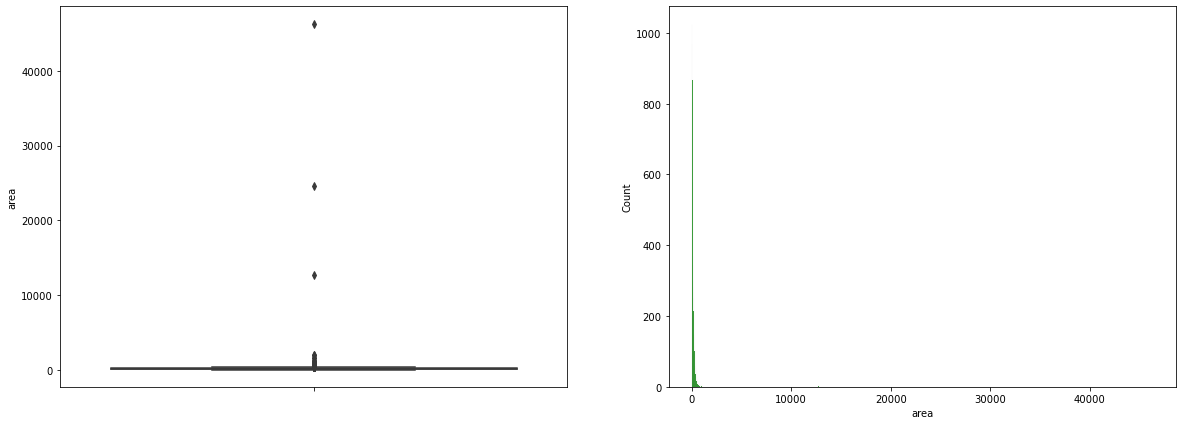

In [15]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(Data["area"], ax = ax[1], color= "g")     
sns.boxplot(y = Data['area'], ax = ax[0], color = "y") 
plt.show()

#### From the above chart we can see there are few outlier, few property have size more than 10000  in dataset

In [16]:
#Now we are taking property whose area is less then 2000
Data1 =Data[Data['area']<2000]

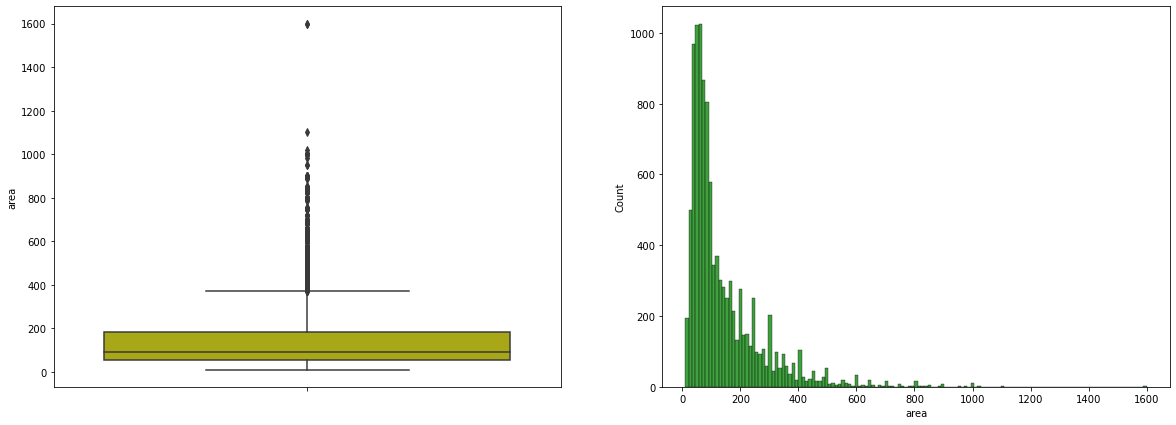

In [17]:
# Create age labels
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(Data1["area"], ax = ax[1], color= "g")     # xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(y = Data1['area'], ax = ax[0], color = "y") # color = y:  yellow
plt.show()

#### From the above chart we can see most of the property lies between 100-400 sqr foot

## HOA: Homeowner association tax 

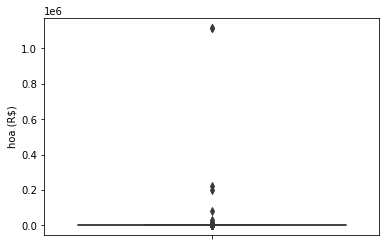

In [18]:
sns.boxplot(y = Data['hoa (R$)'], color = "y") 
plt.show()

#### From the above chart we can see there are few outlier, few property have HO TAX than 10000  in dataset

#### Now we are taking property whose HO TAX is less then 10000

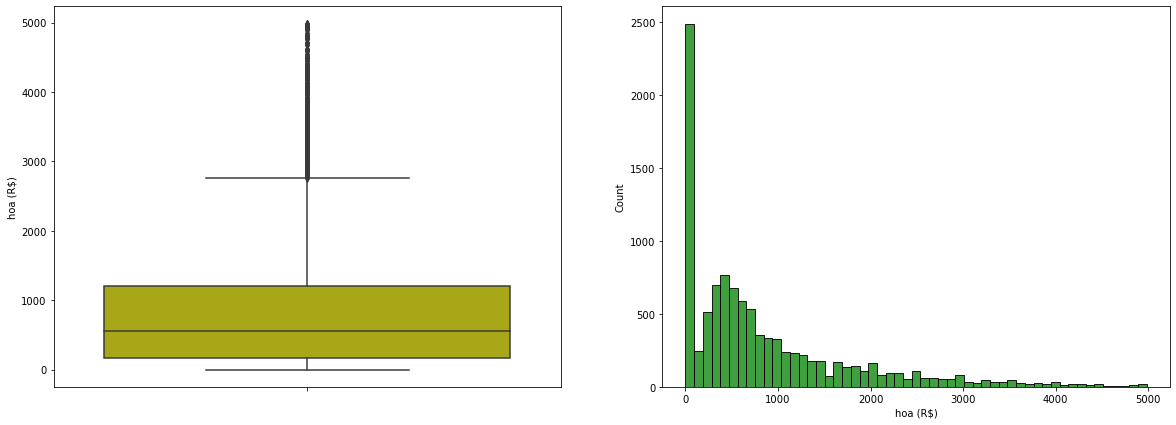

In [45]:
Data1 =Data[Data['hoa (R$)']<5000]
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(Data1["hoa (R$)"], ax = ax[1], color= "g")   
sns.boxplot(y = Data1['hoa (R$)'], ax = ax[0], color = "y") 
plt.show()

### From the above chart we can conclude most of the property have zero HO Tax and max properties lies between 0-1000

# Rent Analysis

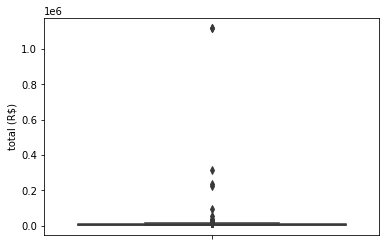

In [23]:
sns.boxplot(y = Data['total (R$)'], color = "y") 
plt.show()

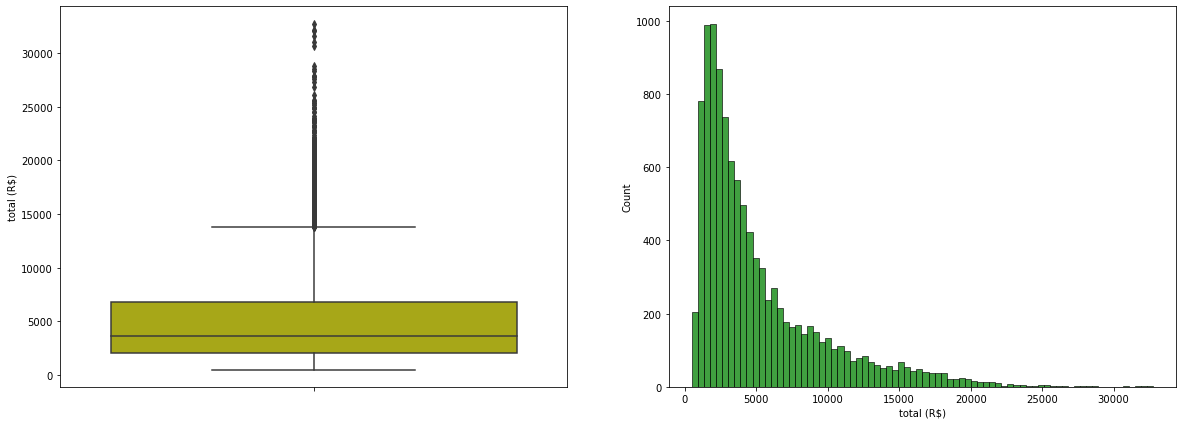

In [24]:
Data1 =Data[Data['total (R$)']<50000]

fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(Data1["total (R$)"], ax = ax[1], color= "g")   
sns.boxplot(y = Data1['total (R$)'], ax = ax[0], color = "y") 
plt.show()

#### Most of the property total rent price lie between 1.5k-7k

In [25]:
Data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# -----------------------------------------Multivariate Analysis------------------------------------

# Que1 Most affordable city to live

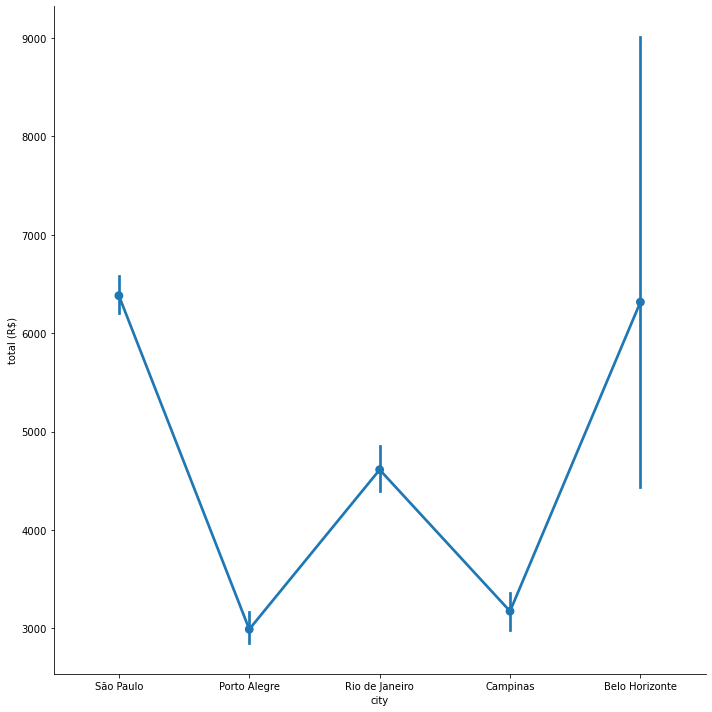

In [26]:
sns.catplot(data = Data, x= 'city', y= 'total (R$)', kind = 'point', height=10);

### From the above chart we can see that Porto Alegre is the cheepest city to live irrespective of anything

# Que2: Which city have cheaper rent based on furniture

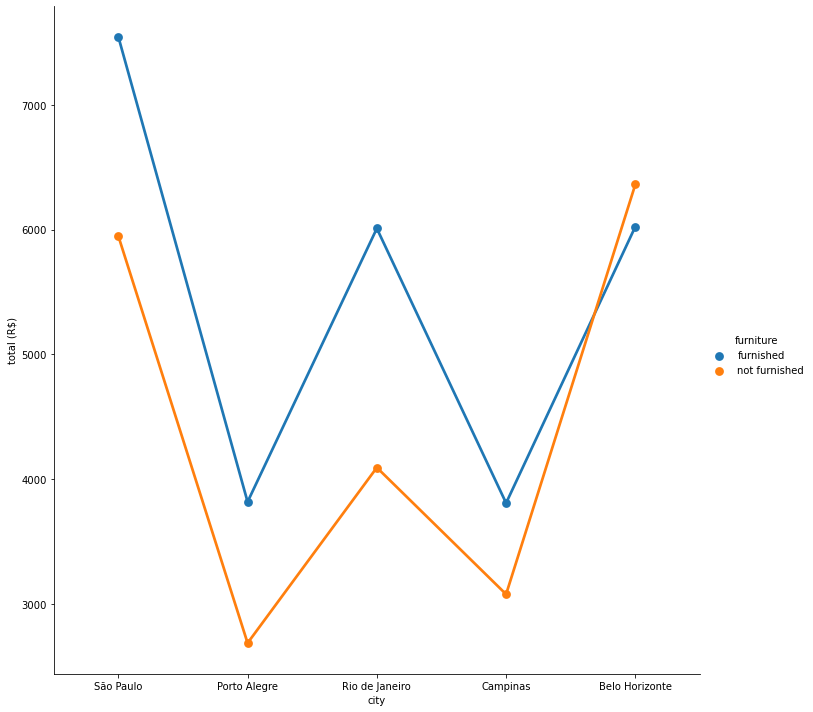

In [27]:
sns.catplot(data = Data, x= 'city', y= 'total (R$)', kind = 'point',hue= 'furniture', ci= False, height=10);

### Interpretation: From the above chart we can see that Porto Alegre has the lower rent of Unfurnished Flat and For Fursnished Flat Campinas and Porto Alegre have almost same price 

# Que3 : Which city have cheaper rate on the basis of Pet Friendly Environment

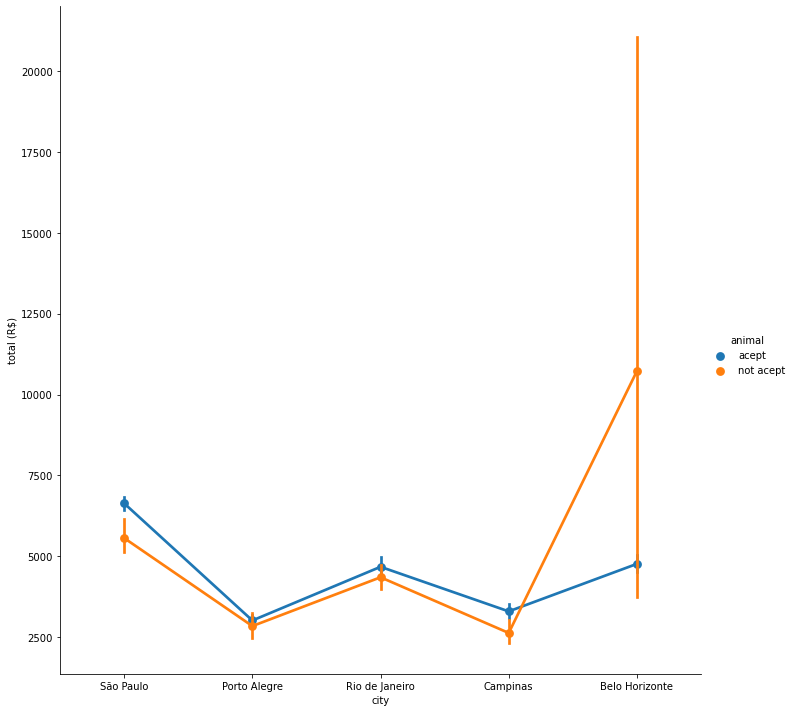

In [28]:
sns.catplot(data = Data, x= 'city', y= 'total (R$)', kind = 'point',hue= 'animal', height=10);

### Interpretation: According to chart analysis Porto Alegre has cheeper rate of property where Animals are allowed and compinas is the chepest city but pets are not allowed

In [29]:
Data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Que4 : Need Two cheapest rooms with saprate bathroom must be furnished and pet friendly

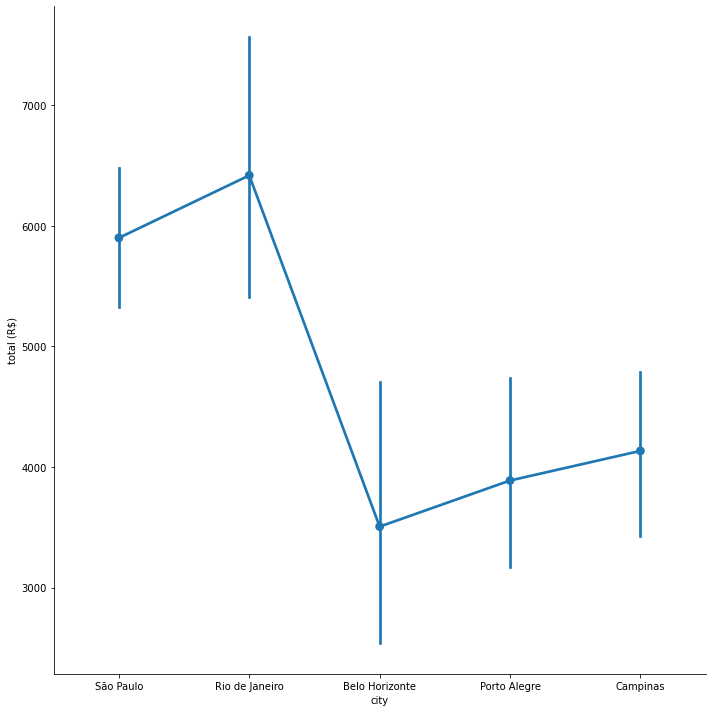

In [30]:
Data1  = Data[(Data['rooms']== 2) & (Data['bathroom']==Data['rooms']) & (Data['animal']=='acept') & (Data['furniture']=='furnished') ]
sns.catplot(data = Data1, x= 'city', y= 'total (R$)', kind = 'point', height=10);

### From the above chart we can clearly see Belo Horizonte has Two Furnished Room with Seprate bathroom and Animal Friendly

# Que5: Need cheapest property with huge space 

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


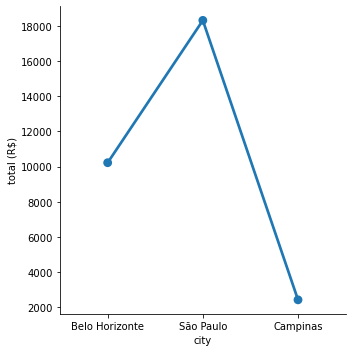

In [31]:
Data1  = Data[(Data['area']>10000) ]
#print()
sns.catplot(data = Data1, x= 'city', y= 'total (R$)', kind = 'point');
Data1

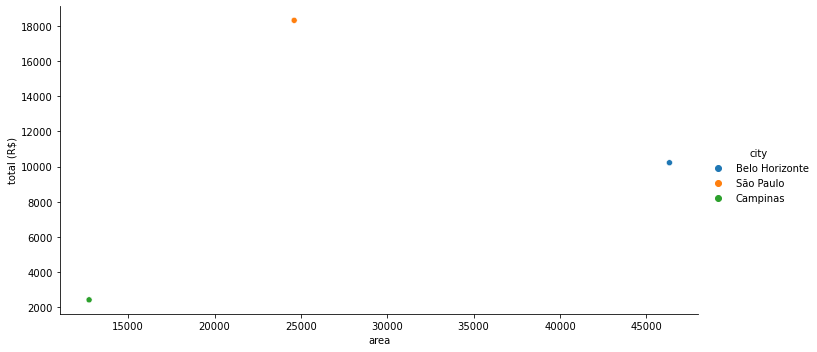

In [32]:
sns.relplot(data = Data1, x= 'area', y= 'total (R$)' , kind = 'scatter', 
           aspect = 2, ci = False, hue = 'city');

### From the above chart we can see three property with space more then 10000 sq foot The Cheapest among all three is Campinas but if you need more space then Belo Horizonte is your choice

# Que6 Need Property IN HIGH Rise Building from where i can get the view of entire city

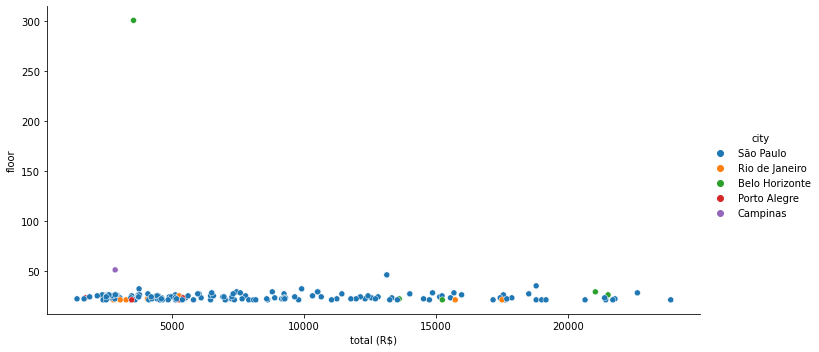

In [33]:
Data1= Data[(Data['floor']>20)]
sns.relplot(data = Data1, y= 'floor', x= 'total (R$)' , kind = 'scatter', 
           aspect = 2, ci = False, hue = 'city');

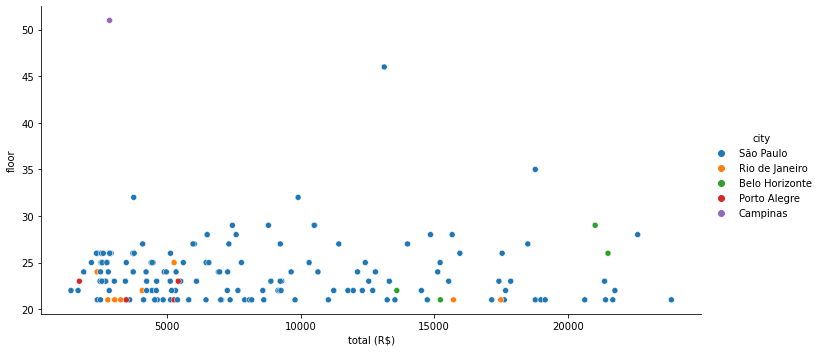

In [34]:
Data1= Data[(Data['floor']>20) & (Data['floor']<300) ]
sns.relplot(data = Data1, y= 'floor', x= 'total (R$)' , kind = 'scatter', 
           aspect = 2, ci = False, hue = 'city');

### From the above both chart we can see that there are properties between 20-30 floor in each city but above that There is one property in Campinas on 50th floor and one in Belo Horizonte at 300 floor 

In [35]:
Data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# Ques7: Is there any realation beween Parking Space and Price of Different city

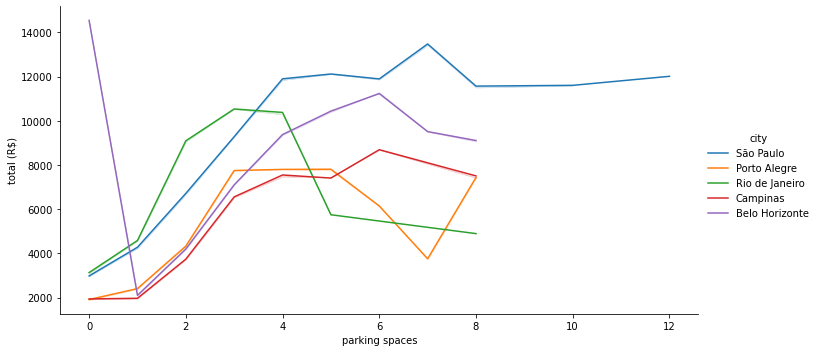

In [36]:
sns.relplot(data = Data, x= 'parking spaces', y= 'total (R$)' , kind = 'line', 
           aspect = 2, ci = False, hue = 'city');

### Interpretation: As we can see price is getting higes as we increase the Parking space till 4 vehicles after that price almost similar

# Ques8: Is there any relation between price and area of different city

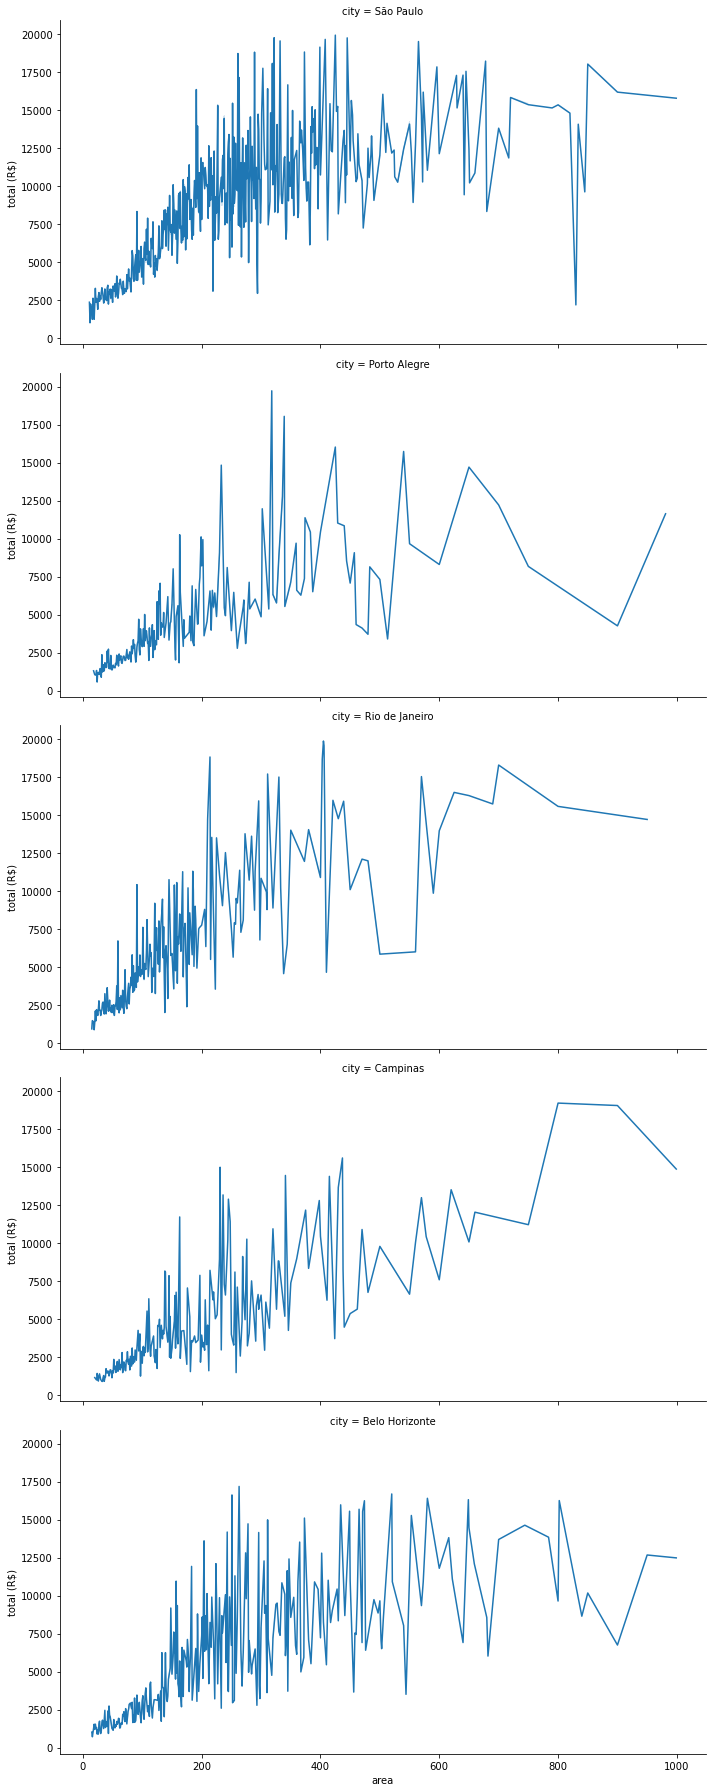

In [37]:
Data1 = Data[(Data['total (R$)']<20000) & (Data['area']<1000)]
sns.relplot(data = Data1, x= 'area', y= 'total (R$)' , kind = 'line', 
           aspect = 2, ci = False, row='city');

### Interpretation: From the above chart we can see that it showing upward trend as we increase the area price also increase

# Que: Is there any relation between Furniture and Price

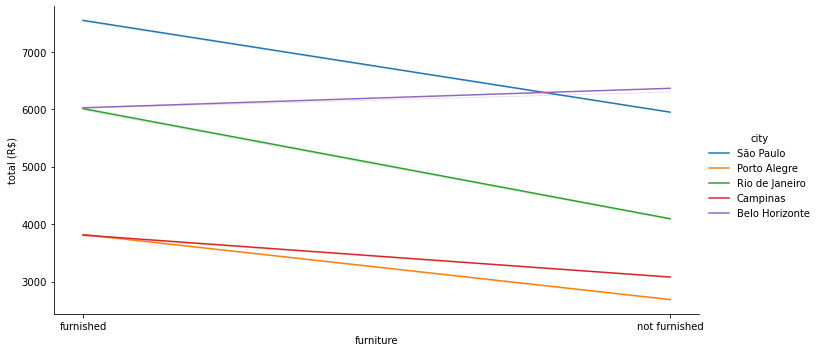

In [38]:
sns.relplot(data = Data, x= 'furniture', y= 'total (R$)' , kind = 'line', 
           aspect = 2, ci = False, hue='city');

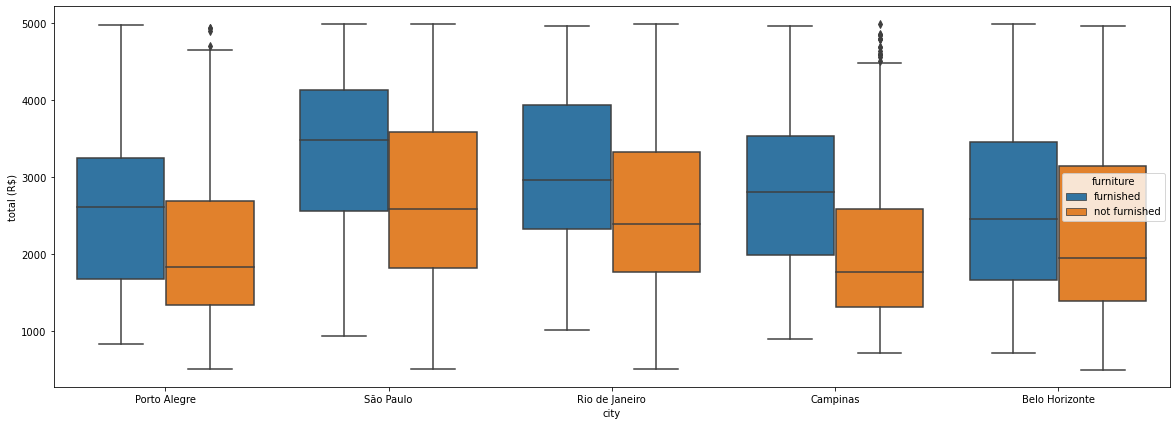

In [39]:
plt.figure(figsize=(20,7))
Data1= Data[(Data['total (R$)']<5000) ]
sns.boxplot(x = Data1["city"], y = Data1["total (R$)"], hue=Data['furniture']);

#### From Above chart we can clearly see that price of Furnished Flat is bit higher as compare to Not Furnished Flat

# Que10: Is there any realtion of price with animal friendly apartment

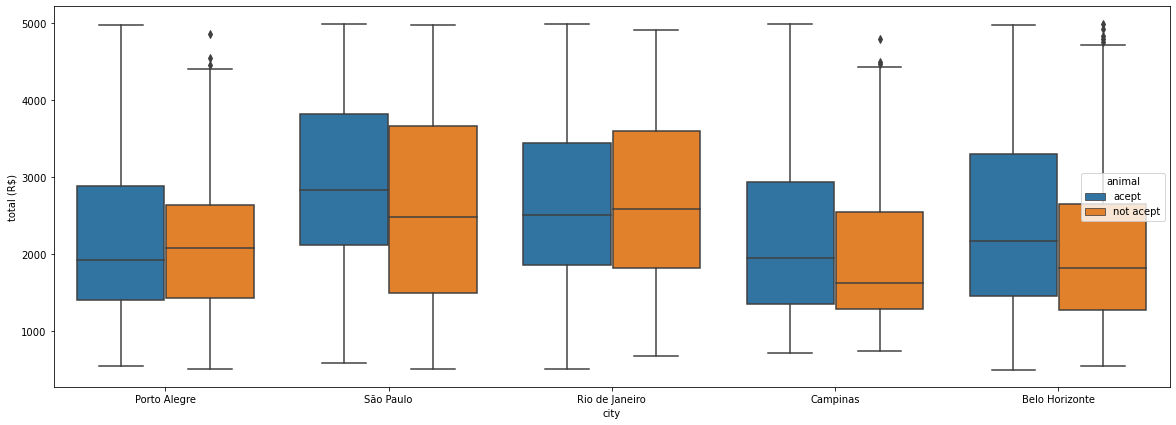

In [40]:
plt.figure(figsize=(20,7))
Data1= Data[(Data['total (R$)']<5000) ]
sns.boxplot(x = Data1["city"], y = Data1["total (R$)"], hue=Data['animal']);

### Most of the cities don't have much impact on price of animals but in Belo Horizonte Price for animal friendly Properties are slight higher

# Que 11 How Price are affected by number of floors

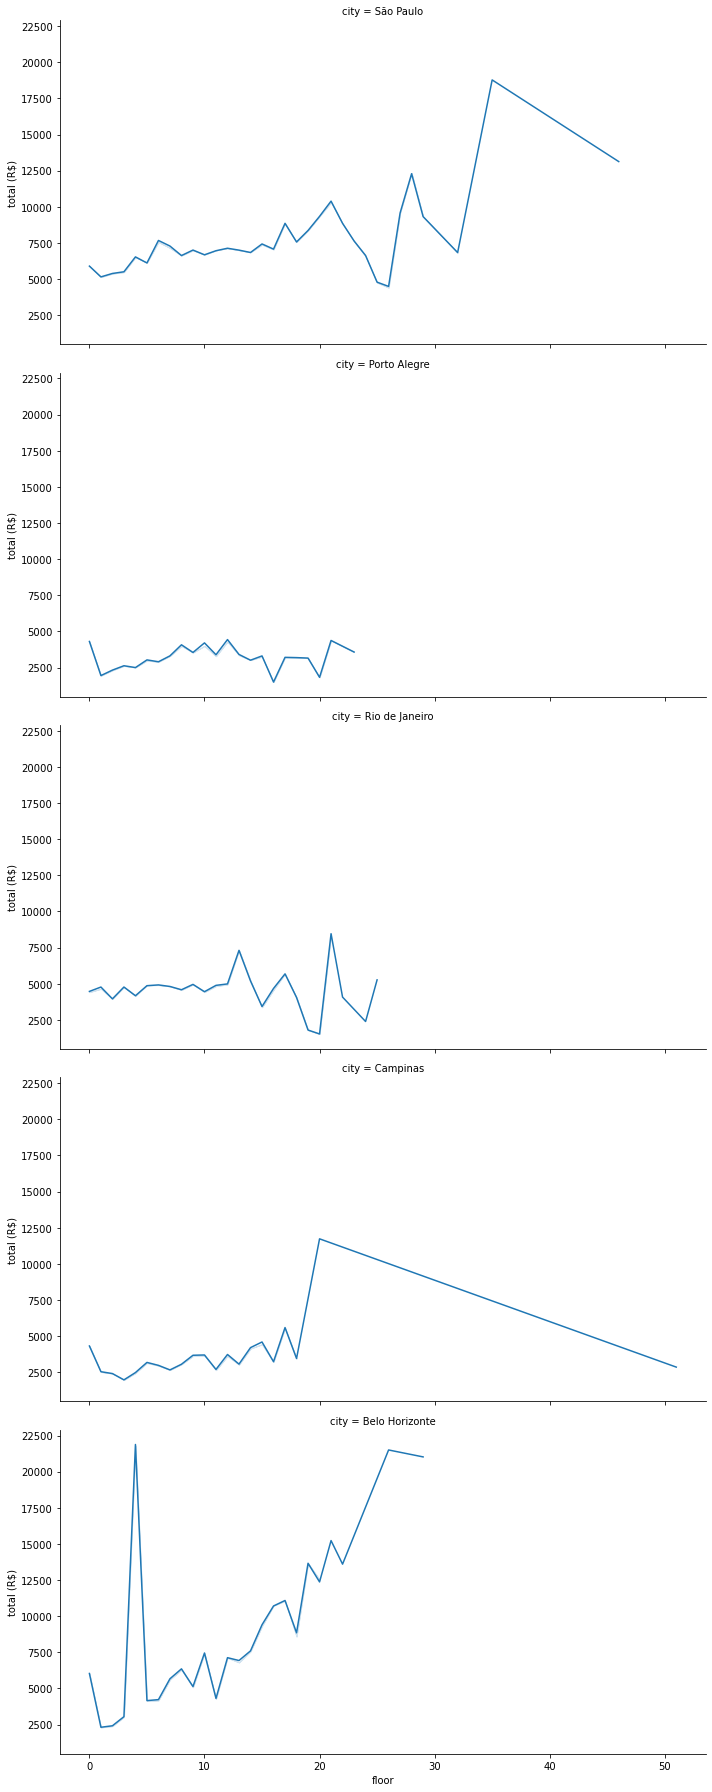

In [41]:
Data1= Data[Data['floor']<60]
sns.relplot(data = Data1, x= 'floor', y= 'total (R$)' , kind = 'line', 
           aspect = 2, ci = False, row='city');

### For most of the city floor does not impact much on price except for Belo Horizonte here price increases as floor increase

# Que12 Which city has majority of houses are pet friendly

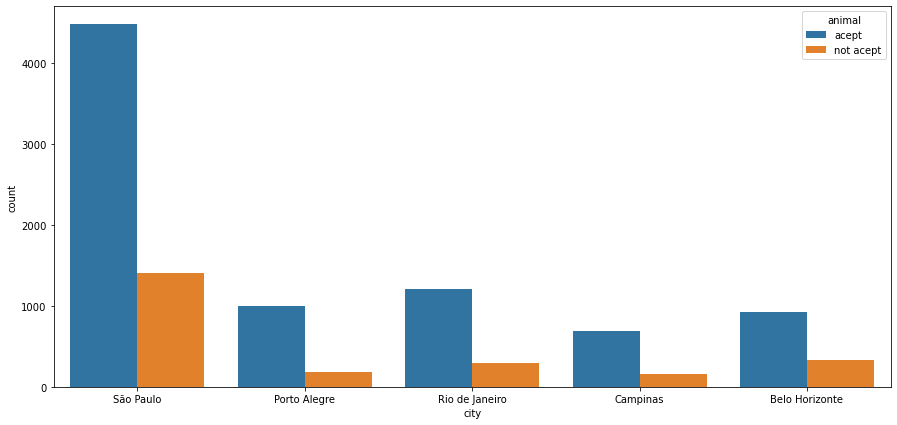

In [42]:
plt.figure(figsize=(15, 7))
sns.countplot( data = Data, x= 'city',hue ="animal")
plt.show()

### From the above chart we can see that Belo Horizonte have max number of houses which are pet friendly

# Que13 Which city has majority of houses are furshined

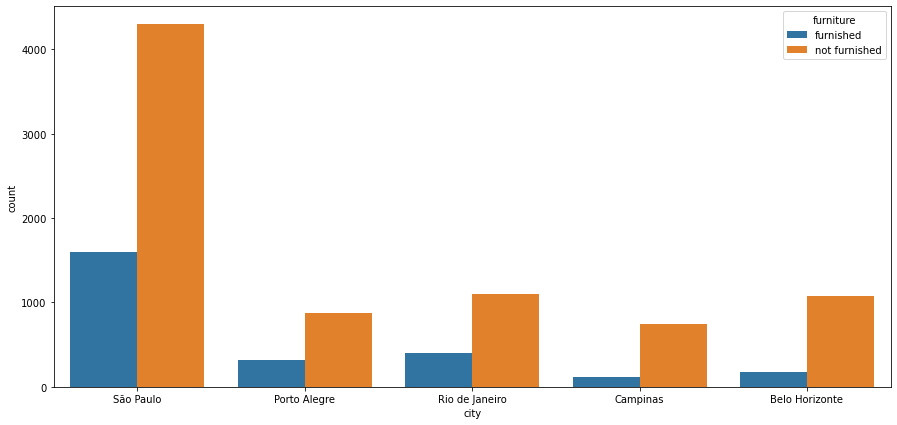

In [43]:
plt.figure(figsize=(15, 7))
sns.countplot( data = Data, x= 'city',hue ="furniture")
plt.show()

### From the above chart we can see that Sao Paulo have max number of houses which are furnished

# Insights of Entire Data

__Availablity__: 55% of properties are from Sao Paulo and rest are from other four city

__Parking Space__: 80% of properties have parking for 0-2 vehicle which includes 25 percent of properties with zero parking space

__Animal Friendly__: More than 75% of properties are animal friendly

__Furniture__: 75% of properties are not Furnished

__Area__: Most of the properties lie between area of 70-300 sq. foot.

__Rent__: Mostly rent lie between 1500-7000 dollar- Porto Alegre is the cheepest city to live irrespective of anything

__Floors__: For most of the city floor does not impact much on price except for Belo Horizonte here price increases as floor increase

## Insights of City Data


__Porto Alegre is the cheepest city to live irrespective of anything__

__Porto Alegre__ has the lower rent of Unfurnished Flat and For Fursnished Flat Campinas and Porto Alegre have almost same price

According to chart analysis __Porto Alegre__ has cheeper rate of property where __Animals are allowed__ and __compinas__ is the chepest city but __pets are not allowed_

Property with space more then 10000 sq foot The Cheapest among all three is __Campinas__ but if you need more space then Belo  __Horizonte__ is your choice

Most of the cities have Properties between 20-30 floor, but above that There is one property in Campinas on 50th floor and one in Belo Horizonte at 300 floor

Rent is higer as we increase the Parking space till 4 vehicles,  after that price almost similar

If we increase the area price also increase

Price of Furnished Flat is bit higher as compare to Not Furnished Flat

# Result based on Requirment

In [48]:
count = 0
while count ==0:
    Area= int(input("Enter Property area of the house in square meters you need:  "))
    Rooms= int(input("Enter rooms you need:   "))
    Bathroom= int(input("Enter how many bathrooms required:  "))
    Parking_spaces= int(input("How many vehicle parking spaces you need:  "))
    Furniture= str(input("You want furnished?   Yes/No    ")).lower()
    Animal= str(input("You want pet friendly?   Yes/No    ")).lower()
    
    if Furniture =='yes':
        F = 'furnished'
    else:
        F = 'not furnished'

    if Furniture =='yes':
        A = 'acept'
    else:
        A = 'not acept'
    Data1 = Data[(Data['area']>Area-15) & (Data['area']<Area+15) & (Data['furniture']==F) & (Data['animal']==A)  & (Data['rooms']==Rooms) & (Data['bathroom']>=Bathroom)& (Data['parking spaces']>=Parking_spaces)]
    if len(Data1.index) ==0:
        ans= str(input("Sorry we do not have any property which meet your criteria do you wish to change filter?   Yes/No  ")).lower()
        if ans !='yes':
            count+=1
        else:
            pass
    else:
        sns.catplot(data = Data1, x= 'city', y= 'total (R$)', kind = 'point');
        plt.show()    
        break

Enter Property area of the house in square meters you need:  2
Enter rooms you need:   2
Enter how many bathrooms required:  2
How many vehicle parking spaces you need:  2
You want furnished?   Yes/No    yes
You want pet friendly?   Yes/No    yes
Sorry we do not have any property which meet your criteria do you wish to change filter?   Yes/No  1
